In [17]:
from csv_reader import read_csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Barometric data
barometer = 'weather-data/barometer-1617.csv'
csv = read_csv(barometer)
df_baro = pd.DataFrame(csv)
df_baro["Baro"] = pd.to_numeric(df_baro["Baro"], errors='coerce')
df_baro.index = pd.to_datetime(df_baro["DateTime"])

# Indoor temperatures
csvfilepath = 'weather-data/indoor-temperature-1617.csv'
csv = read_csv(csvfilepath)
df_indoor = pd.DataFrame(csv)
df_indoor.index = pd.to_datetime(df_indoor["DateTime"])
df_indoor["Humidity"] = pd.to_numeric(df_indoor["Humidity"], errors='coerce')
df_indoor["Temperature"] = pd.to_numeric(df_indoor["Temperature"], errors='coerce')
df_indoor["Temperature_range (low)"] = pd.to_numeric(df_indoor["Temperature_range (low)"], errors='coerce')
df_indoor["Temperature_range (high)"] = pd.to_numeric(df_indoor["Temperature_range (high)"], errors='coerce')

# Outdoor temperatures
csvfilepath = 'weather-data/outside-temperature-1617.csv'
csv = read_csv(csvfilepath)
df_outdoor = pd.DataFrame(csv)
df_outdoor.index = pd.to_datetime(df_outdoor["DateTime"])
df_outdoor["Temperature"] = pd.to_numeric(df_outdoor["Temperature"], errors='coerce')
df_outdoor["Temperature_range (low)"] = pd.to_numeric(df_outdoor["Temperature_range (low)"], errors='coerce')
df_outdoor["Temperature_range (high)"] = pd.to_numeric(df_outdoor["Temperature_range (high)"], errors='coerce')

# Rainfall
csv = read_csv('weather-data/rainfall-1617.csv')
df_rain = pd.DataFrame(csv)
df_rain["mm"] = pd.to_numeric(df_rain["mm"], errors='coerce')
df_rain.index = pd.to_datetime(df_rain["DateTime"])

# Indoor temperatures with modified data
csvfilepath = 'weather-data/indoor-temperature-1617 modified.csv'
csv = read_csv(csvfilepath)
df_indoor_mod = pd.DataFrame(csv)
df_indoor_mod.index = pd.to_datetime(df_indoor_mod["DateTime"])
df_indoor_mod["Humidity"] = pd.to_numeric(df_indoor_mod["Humidity"], errors='coerce')
df_indoor_mod["Temperature"] = pd.to_numeric(df_indoor_mod["Temperature"], errors='coerce')
df_indoor_mod["Temperature_range (low)"] = pd.to_numeric(df_indoor_mod["Temperature_range (low)"], errors='coerce')
df_indoor_mod["Temperature_range (high)"] = pd.to_numeric(df_indoor_mod["Temperature_range (high)"], errors='coerce')

CSV reader summary: 356 lines read. 356 parsed. 0 failed
CSV reader summary: 355 lines read. 355 parsed. 0 failed
CSV reader summary: 356 lines read. 356 parsed. 0 failed
CSV reader summary: 354 lines read. 354 parsed. 0 failed
CSV reader summary: 355 lines read. 355 parsed. 0 failed


In [41]:
# Basic statistics
print(df_baro.describe())
print(df_indoor.describe())
print(df_outdoor.describe())
print(df_rain.describe())

              Baro
count   355.000000
mean   1009.998873
std       9.869662
min     979.600000
25%    1004.850000
50%    1010.500000
75%    1016.050000
max    1035.600000
         Humidity  Temperature  Temperature_range (low)  \
count  354.000000   354.000000               354.000000   
mean    48.519774    21.827885                20.555932   
std      5.188886     2.058307                 2.405125   
min     37.000000    18.040000                14.900000   
25%     44.000000    20.345000                18.725000   
50%     48.000000    21.710000                20.600000   
75%     52.000000    22.710000                21.900000   
max     59.000000    29.210000                28.200000   

       Temperature_range (high)  
count                354.000000  
mean                  23.533616  
std                    1.701466  
min                   19.700000  
25%                   22.500000  
50%                   23.200000  
75%                   24.100000  
max                   31.

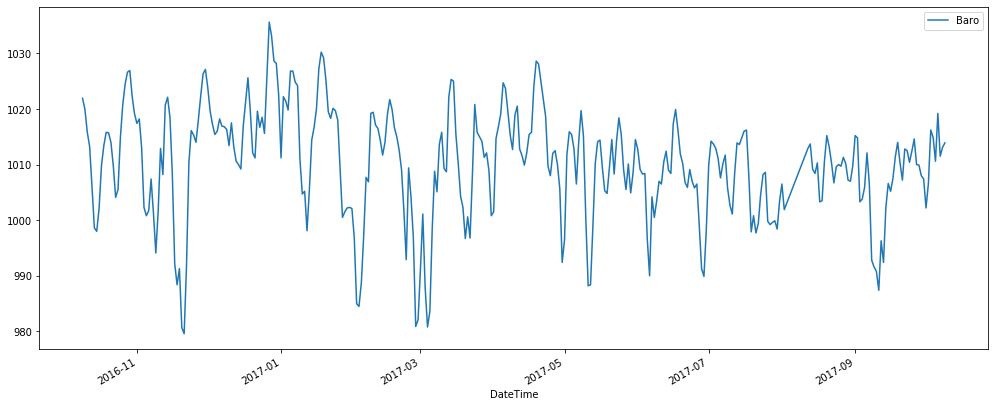

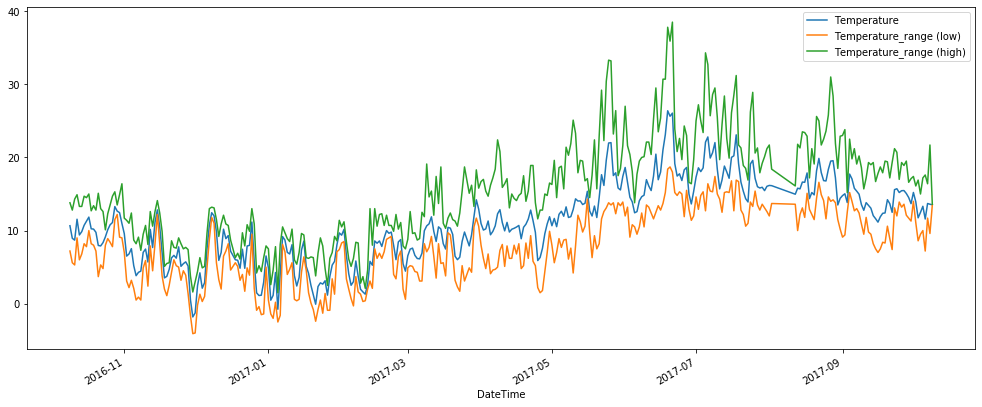

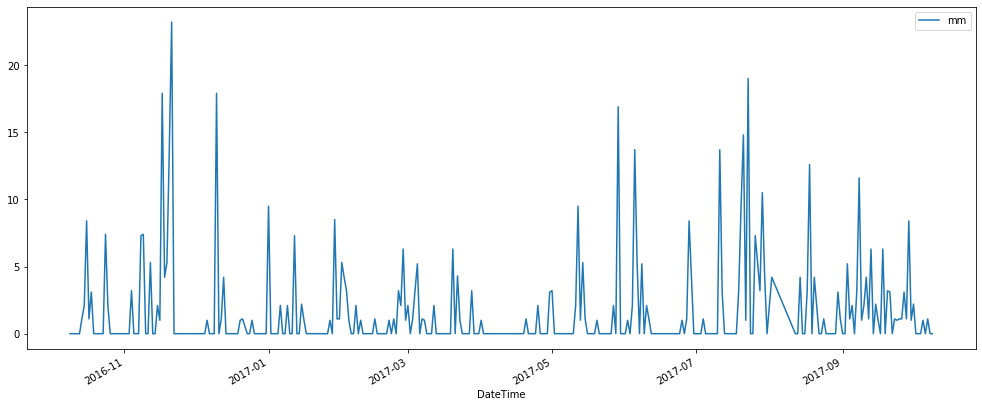

In [57]:
df_baro.plot(figsize=(17,7));
#df_indoor.plot(figsize=(17,7))
df_outdoor.plot(figsize=(17,7))
df_rain.plot(figsize=(17,7))

         Humidity  Temperature  Temperature_range (low)  \
count  354.000000   354.000000               354.000000   
mean    48.440678    22.067828                20.499435   
std      7.858027     3.305040                 2.641508   
min    -20.000000    18.040000                 0.000000   
25%     44.000000    20.345000                18.700000   
50%     48.000000    21.725000                20.600000   
75%     52.000000    22.765000                21.900000   
max    100.000000    50.000000                28.200000   

       Temperature_range (high)  
count                354.000000  
mean                  23.753107  
std                    4.405270  
min                   19.700000  
25%                   22.500000  
50%                   23.200000  
75%                   24.175000  
max                  100.000000  


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


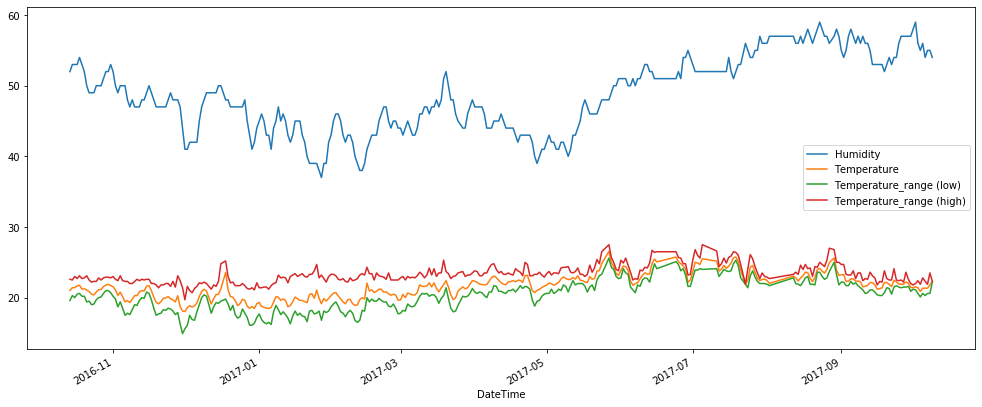

In [71]:
# Clean up outliers using the Outlier Labeling Rule (Hoaglin, Iglewitz, Tukeym, 1986, Performance of some resistant rules for outlier labeling)
# Using factor 2.2 as proposed in the book

print(df_indoor_mod.describe())


humidity_stats = df_indoor_mod["Humidity"].describe()
humidity_lower_bound = humidity_stats["25%"]-(humidity_stats["75%"]-humidity_stats["25%"])*2.2
humidity_upper_bound = humidity_stats["75%"]+(humidity_stats["75%"]-humidity_stats["25%"])*2.2
df_indoor_cleaned = df_indoor_mod[(df_indoor_mod['Humidity'] >= humidity_lower_bound) & 
                                  (df_indoor_mod['Humidity'] <= humidity_upper_bound)]  

# Temperature
temperature_stats = df_indoor_cleaned["Temperature"].describe()
temperature_lower_bound = temperature_stats["25%"]-(temperature_stats["75%"]-temperature_stats["25%"])*2.2
temperature_upper_bound = temperature_stats["75%"]+(temperature_stats["75%"]-temperature_stats["25%"])*2.2
df_indoor_cleaned = df_indoor_cleaned[(df_indoor_mod['Temperature'] >= temperature_lower_bound) & 
                                  (df_indoor_mod['Temperature'] <= temperature_upper_bound)] 

# Temperature_range (low)
temperaturelow_stats = df_indoor_cleaned["Temperature_range (low)"].describe()
temperaturelow_lower_bound = temperaturelow_stats["25%"]-(temperaturelow_stats["75%"]-temperaturelow_stats["25%"])*2.2
temperaturelow_upper_bound = temperaturelow_stats["75%"]+(temperaturelow_stats["75%"]-temperaturelow_stats["25%"])*2.2
df_indoor_cleaned = df_indoor_cleaned[(df_indoor_mod['Temperature_range (low)'] >= temperaturelow_lower_bound) & 
                                  (df_indoor_mod['Temperature_range (low)'] <= temperaturelow_upper_bound)] 

# Temperature_range (high)
temperaturehigh_stats = df_indoor_cleaned["Temperature_range (high)"].describe()
temperaturehigh_lower_bound = temperaturehigh_stats["25%"]-(temperaturehigh_stats["75%"]-temperaturehigh_stats["25%"])*2.2
temperaturehigh_upper_bound = temperaturehigh_stats["75%"]+(temperaturehigh_stats["75%"]-temperaturehigh_stats["25%"])*2.2
df_indoor_cleaned = df_indoor_cleaned[(df_indoor_mod['Temperature_range (high)'] >= temperaturehigh_lower_bound) & 
                                  (df_indoor_mod['Temperature_range (high)'] <= temperaturehigh_upper_bound)] 
                                   
df_indoor_cleaned.plot(figsize=(17,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f1186950>,
      dtype=object)

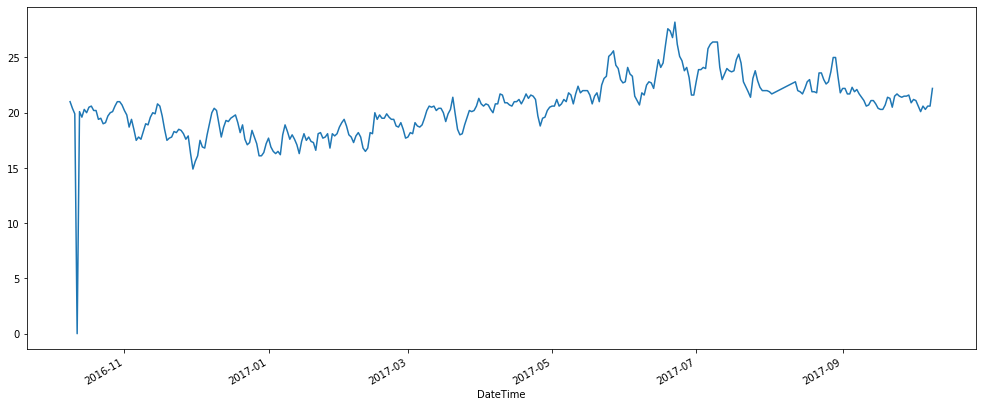

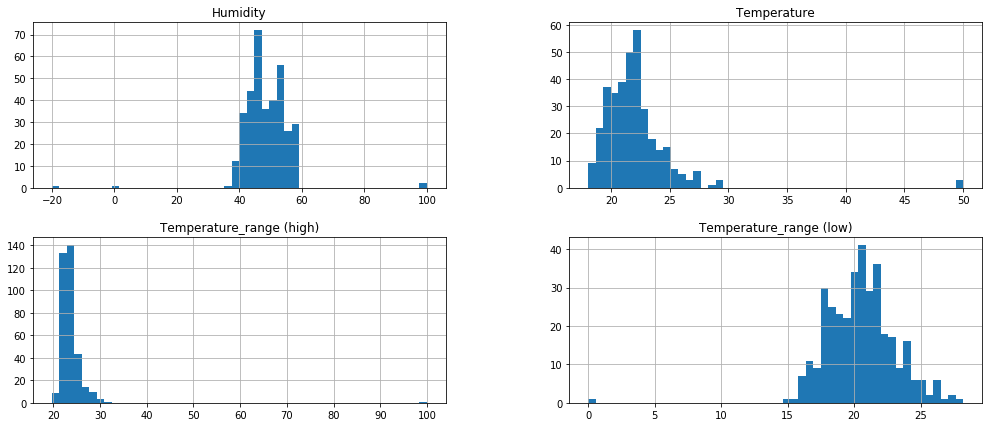

In [65]:
df_indoor_mod["Temperature_range (low)"].plot(figsize=(17,7))
#df_indoor_mod["Temperature_range (low)"].hist(figsize=(17,7))
df_indoor_mod.hist(bins=50,figsize=(17,7))